In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import Model
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

## Load dataset by using fetch_openml which it get a rest api from www.openml.ai .
## we picked a mnist dataset which is a hand digit written from 0-9 .

In [21]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True,as_frame = True)

In [22]:
z = pd.concat([X,y],axis=1)
z.to_csv('mnist-datset.csv')

## Example of the hand digit written

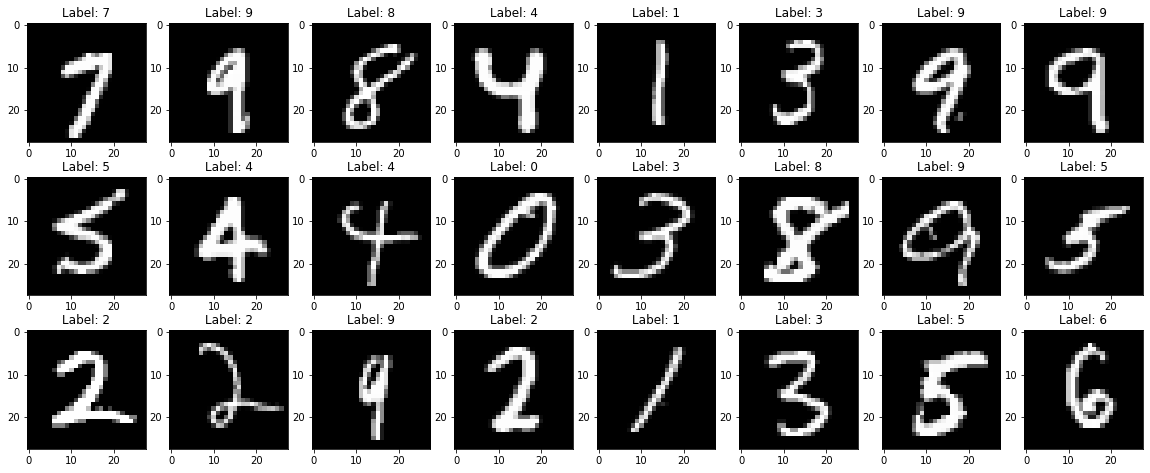

In [4]:
idx = np.random.choice(len(X), 24)
fig, ax = plt.subplots(3, 8, figsize=(20, 8))
## rearange ax to 0-24
ax = [*ax[0], *ax[1], *ax[2]]
for i in range(len(idx)):
    img = X[idx[i]].reshape(28, 28)
    ax[i].set_title(f'Label: {y[idx[i]]}')
    ax[i].imshow(img, cmap='gray')

## split a data into train , test set (63000 : 7000)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,28,28), y.astype('int'), test_size=0.1, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(63000, 28, 28) (7000, 28, 28) (63000,) (7000,)


## try to use a neural network model by using only Dense layers along with dropout layers 

In [6]:
inputs = Input(shape = (28,28))
x = Flatten()(inputs)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(10, activation='softmax')(x)
model= Model(inputs = inputs, outputs = prediction)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## set hyper parameters such learning rate, optimizer , metric 

In [7]:
nb_epochs = 10
batch_size = 256
early_stopping = EarlyStopping(patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=10, min_lr=0.001)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## training phase 

In [8]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epochs,
    validation_data=(X_test, y_test),shuffle=True, callbacks = [early_stopping,reduce_lr])

Train on 63000 samples, validate on 7000 samples
Epoch 1/10
63000/63000 [==============================] - 1s 16us/sample - loss: 5.6396 - acc: 0.8847 - val_loss: 0.7662 - val_acc: 0.9330
Epoch 2/10
63000/63000 [==============================] - 1s 12us/sample - loss: 0.6035 - acc: 0.9273 - val_loss: 0.4701 - val_acc: 0.9414
Epoch 3/10
63000/63000 [==============================] - 1s 12us/sample - loss: 0.3338 - acc: 0.9413 - val_loss: 0.3460 - val_acc: 0.9509
Epoch 4/10
63000/63000 [==============================] - 1s 11us/sample - loss: 0.2331 - acc: 0.9528 - val_loss: 0.3452 - val_acc: 0.9534
Epoch 5/10
63000/63000 [==============================] - 1s 12us/sample - loss: 0.1816 - acc: 0.9598 - val_loss: 0.3102 - val_acc: 0.9586
Epoch 6/10
63000/63000 [==============================] - 1s 12us/sample - loss: 0.1544 - acc: 0.9653 - val_loss: 0.2874 - val_acc: 0.9616
Epoch 7/10
63000/63000 [==============================] - 1s 12us/sample - loss: 0.1383 - acc: 0.9678 - val_loss: 0.2

## plot accuracy and loss

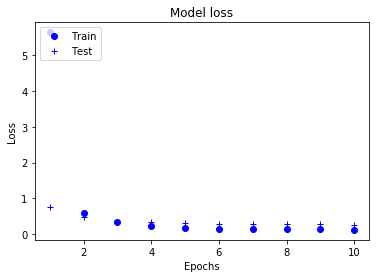

In [9]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Loss');

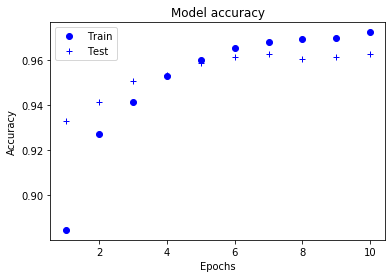

In [10]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

## evaluate 

In [11]:
loss, accuracy = model.evaluate(X_train,y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.987000  ;  loss = 0.044589


In [12]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.962571  ;  loss = 0.247207


## confusion maxtrix 

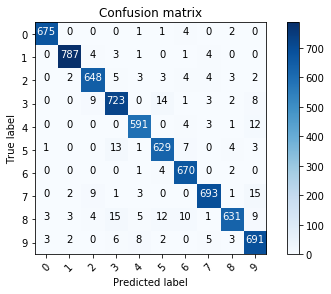

In [13]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# compute the confusion matrix

confusion_mtx = confusion_matrix(y_test.astype('int'), Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))
#print(confusion_mtx)

## inspect correct and wrong prediction 

In [14]:
predicted = model.predict(X_test)
predicted_classes = np.argmax(predicted,axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [15]:
print("Number of true predictions: ", len(correct_indices))
print("Number of false predictions:", len(incorrect_indices))

Number of true predictions:  6738
Number of false predictions: 262


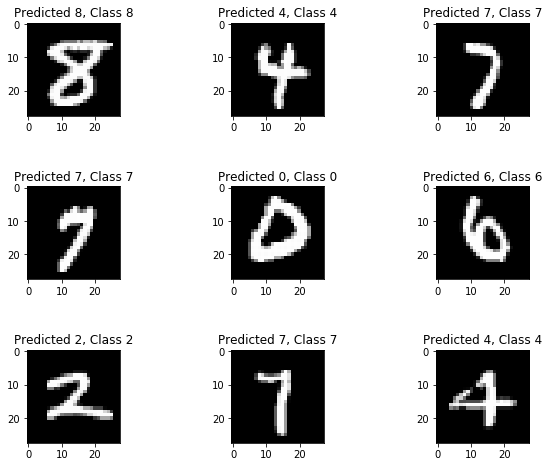

In [17]:
plt.rcParams['figure.figsize'] = (9,9) 
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.subplots_adjust(wspace=1.2, hspace=0.01)

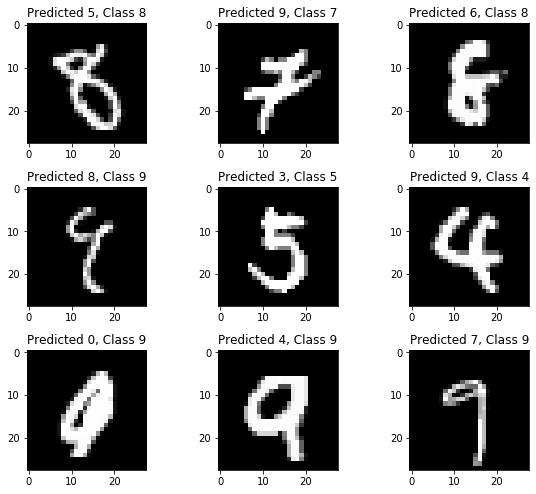

In [19]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.subplots_adjust(wspace=0.6, hspace=0.01)